# League Of Legends - Classification Problem


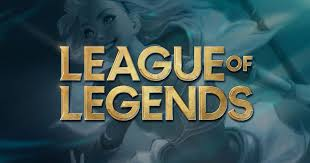

In [ ]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
league = pd.read_csv('../input/league-of-legends-diamond-ranked-games-10-min/high_diamond_ranked_10min.csv')
pd.set_option("max_columns", None)
league

Deleting the colum of 'gameId' because it doesn't contribute for understanding the data


In [ ]:
league.drop(['gameId'], axis = 1, inplace=True)

Predicting the victory of a team just from one column of information to form a basic knowledge of what column to keep and what to discard

In [ ]:
y = league.blueWins
y = np.array(y)
x = league
knn = KNeighborsClassifier(n_neighbors = 5)
X = []
Acc = []
for i in league:
    temp = league[i]
    temp = pd.DataFrame(temp)
    knn.fit(temp, y)
    y_pred = knn.predict(temp)
    acc = metrics.accuracy_score(y, y_pred)
    Acc.append(acc)
    print(i ," ",acc)
    if acc > 0.75 and acc < 1: # Creating an array of the important features(above 0.75 accuracy for feature)
        X.append(i)

In [ ]:
col = np.arange(len(league.columns))
fig = plt.figure()
axes = fig.add_axes([0,0,2,1])
plt.bar(col, Acc, width=0.5, alpha=0.7)
plt.xlabel('column number')
plt.ylabel('% Accuracy')
axes.set_xticks(col)
plt.title("Accuracy prediction with one feature")
print("The next graph is from the data printed above")
plt.show()

In [ ]:
fig = plt.figure()
axes = fig.add_axes([0,0,2,1])
plt.scatter(league['redGoldDiff'], y)
plt.xlabel('Red Gold Difference')
plt.ylabel('1 blue won')
plt.title("Scatter graph to see the edge cases")
plt.show()

In the next cell I will get rid of the edge cases:

Whenever a team had a huge lead on gold and experience but still lost the game I will consider it as an abnormal senerio

In [ ]:
league.drop(league.loc[(league['redGoldDiff'] < -4500) & (league['blueWins'] == 0)].index, axis = 0, inplace=True)
league.drop(league.loc[(league['redGoldDiff'] >  4500) & (league['blueWins'] == 1)].index, axis = 0, inplace=True)

In [ ]:
league.drop(league.loc[(league['redExperienceDiff'] < -4500) & (league['blueWins'] == 0)].index, axis = 0, inplace=True)
league.drop(league.loc[(league['redExperienceDiff'] >  4500) & (league['blueWins'] == 1)].index, axis = 0, inplace=True)

We can tell that the most important information to take in order to predict wich team would win is about the gold and experience

In [ ]:
y = league.blueWins
y = np.array(y)

In [ ]:
relevantDF = league[X]
K = [1,3,5,7,10,25,50,100]
print("This is the knn moudle with only the important data")
for k in K:
    knn = KNeighborsClassifier(n_neighbors=k)
    X_train, X_test, y_train, y_test = train_test_split(relevantDF, y, test_size=0.2,random_state=1)
    knn.fit(X_train , y_train)
    y_pred = knn.predict(X_test)
    print("knn =", k,": ",metrics.accuracy_score(y_test, y_pred))

In [ ]:
print("This is the knn moudle with all the data")
for k in K:
    knn = KNeighborsClassifier(n_neighbors=k)
    X_train, X_test, y_train, y_test = train_test_split(league, y, test_size=0.2,random_state=1)
    knn.fit(X_train , y_train)
    y_pred = knn.predict(X_test)
    print("knn =", k,": ",metrics.accuracy_score(y_test, y_pred))

In [ ]:
print(relevantDF.shape)
print(league.shape)

We can see from the results above that when we are taking the important data with 10 culomn we are getting approximately the same result as if we are taking all the features in the data

### Analyzing data correlation:

In [ ]:
import seaborn as sns
X.append('blueWins')
relevantDF = league[X]
axes = plt.subplots(1, 1, figsize=(10, 8))
axes = sns.heatmap(relevantDF.corr(), annot=True , linewidths=0.5)

From the heat map above we can see that we can take even less features because some of the features can be repetitive like 'blueGoldDiff' and 'redGoldDiff'

In [ ]:
relevantDF = league[['blueExperienceDiff' ,'blueGoldDiff' ,'redTotalGold']]
knn = KNeighborsClassifier(n_neighbors = 50)
X_train, X_test, y_train, y_test = train_test_split(relevantDF, y, test_size=0.2,random_state=1)
knn.fit(X_train , y_train)
y_pred = knn.predict(X_test)
print("knn = 50",": ",metrics.accuracy_score(y_test, y_pred))

With only three features we got 74% Accuracy.
Only 0.0092% accuracy difference when using all the data!

### Dimensionality Redaction:

The amount of wards is not helping basically you place a ward so you will see if someone is coming to help the enemy kill you but we have a column for the kills.

In [ ]:
league.drop(['blueWins'], axis = 1, inplace=True)
league.drop(['blueWardsPlaced','blueWardsDestroyed'], axis = 1, inplace=True)
league.drop(['redWardsPlaced','redWardsDestroyed'], axis = 1, inplace=True)

### Dummy module option:

In [ ]:
print("Amount of victories for each team (0 - red victory , 1 - blue victory)")
print(pd.value_counts(y))

In [ ]:
print("Accuracy for dummy moudle in the test group ",y_test.mean())
print("Accuracy for dummy moudle for all the group ",y.mean())

If we were to use dummy moudle it would be insuffisant with accuracy of about 50% and in the knn moudle we get about 74% accuracy

### KNN module with no test and train group:

In [ ]:
for k in K:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(league, y)
    y_pred = knn.predict(x)
    print("knn =", k,": ",metrics.accuracy_score(y, y_pred))

When the knn is 1 so there is 100% accuracy this is called overfitting because with all the existing data it will perform perfect but once we insert new data to predict this kind of moudle won't give us the best results, I would have take knn = 3
because it will give a 82% accuracy with enough neighbours for comparison.

** This moudle is more accurate then the ones we saw above because here we didn't split the data to test group and learning group

### <b>Improving the module:</b>

After getting to accuarcy of 74% I wanted to improve it so I took all the indexes that the predicted probabilty was 0.45-0.55
meaning there's a chance of mistake in the prediction.
so I took 2 different features built a new module with them and relied on that module, even though this module alone has accuracy of 61%

In [ ]:
monster = league[['redEliteMonsters' , 'blueEliteMonsters']]
knn = KNeighborsClassifier(n_neighbors=5)
X_train, X_test, y_train, y_test = train_test_split(monster, y, test_size=0.2,random_state=1)
knn.fit(X_train , y_train)
y_pred2 = knn.predict(X_test)
print("knn = 5",":",metrics.accuracy_score(y_test, y_pred2))
prob2 = pd.DataFrame(knn.predict_proba(X_test))
prob2.head()

In [ ]:
knn = KNeighborsClassifier(n_neighbors=50)
X_train, X_test, y_train, y_test = train_test_split(relevantDF, y, test_size=0.2,random_state=1)
knn.fit(X_train , y_train)
y_pred1 = knn.predict(X_test)
check = pd.DataFrame(knn.predict_proba(X_test))#converting it to df to use loc
ind = check.loc[(check[0] > 0.45) & (check[0] < 0.55)].index
prob1 = (knn.predict_proba(X_test))
for i in ind:
    prob1[i][0] = prob2.loc[i][0]
    prob1[i][1] = prob2.loc[i][1]
prob1[prob1 > 0.5] = 1
prob1[prob1 <= 0.5] = 0
print('Accuracy after improving the module: ' ,metrics.accuracy_score(y_test, prob1[:,1]))
print('Improved by 0.5%')

Here we can see an attempt to improve to module with Elite monster data but with very little succsess for the amount of work

### *KNN: Cofusion Matrix*

In [ ]:
confusion = metrics.confusion_matrix(y_test, prob1[:,1])
print("confusion matrix: ")
print(confusion)

In [ ]:
TP = confusion[1, 1]
print("True positive: " ,TP)
TN = confusion[0, 0]
print("True nagetive: " ,TN)
FP = confusion[0, 1]
print("False positive: " ,FP)
FN = confusion[1, 0]
print("False nagetive: " ,FN)

In [ ]:
print("Accuracy: ",(TP + TN) / (TP + TN + FP + FN))
print("Classification Error: ",1-(TP + TN) / (TP + TN + FP + FN))
print("Recall: ", TP/(TP+FN))
print("Precision: ", TP/(TP+FP))
print("False positive rate: ", FP/(TN+FP))

In [ ]:
b = 1
F = (1+b*b)*TP/((1+b*b)*TP + b*FN + FP)
print(F)

### <b>Classification with Gaussian module</b>

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(relevantDF, y, test_size=0.2, random_state=1)
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print("Accuracy when using the Gaussian module:" ,accuracy_score(y_test, y_pred))

### *ROC Graph for Gaussian module:*

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(relevantDF, y, test_size=0.3, random_state=2)
y_pred = gnb.predict_proba(X_test)
y_pred = y_pred[:, 1] # taking only the positive outcomes
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)#using a saved function that to calculate the roc curve
plt.plot([0,1], [0,1], label='Dummy')
plt.plot(fpr, tpr, marker='', label='Gaussian')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()

### Cross Validiation:

In [ ]:
K = np.arange(1,100)
scores = []
for k in K:
    knn = KNeighborsClassifier(n_neighbors = k)
    CV = cross_val_score(knn, relevantDF ,y, cv = 10 ,scoring='accuracy')
    scores.append(CV.mean())
plt.plot(K, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Average Cross-Validated Accuracy')
plt.grid(True)
plt.show()

In [ ]:
print("The maximum average score when using cross validation is :",max(scores))
print("When the knn = ", scores.index(max(scores))+1)